In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training data shape: {x_train.shape}")  # (50000, 32, 32, 3)
print(f"Training labels shape: {y_train.shape}")  # (50000, 1)
print(f"Test data shape: {x_test.shape}")  # (10000, 32, 32, 3)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)


In [ ]:
assert not np.any(np.isnan(x_train)), "NaNs found in x_train"
assert not np.any(np.isnan(y_train)), "NaNs found in y_train"
assert np.all((y_train >= 0) & (y_train <= 9)), "Labels out of range"


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


<ipython-input-5-bc9b10022573>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train.flatten(), palette="viridis")


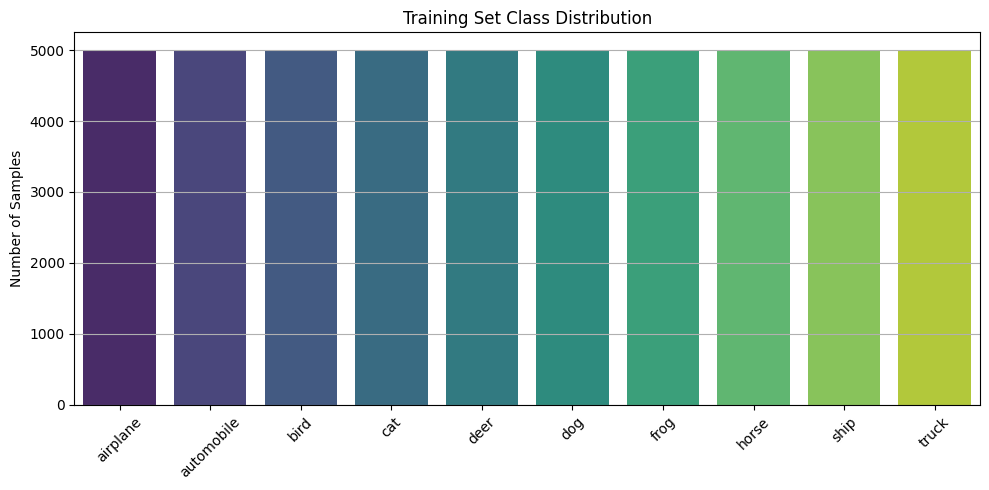

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
sns.countplot(x=y_train.flatten(), palette="viridis")
plt.title("Training Set Class Distribution")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


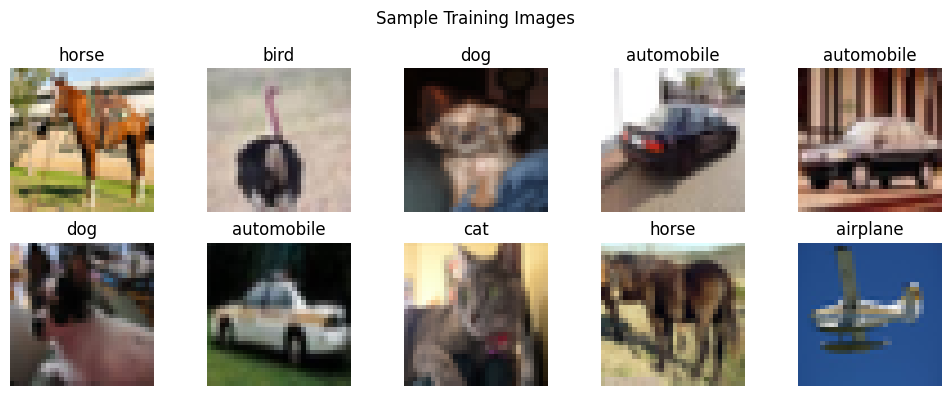

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = np.random.randint(0, len(x_train))
    plt.imshow(x_train[idx])
    plt.title(class_names[y_train[idx][0]])
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.tight_layout()
plt.show()


In [ ]:
mean = np.mean(x_train, axis=(0,1,2))
std = np.std(x_train, axis=(0,1,2))
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, MaxPooling2D,
                                     Dropout, GlobalAveragePooling2D, Dense, SeparableConv2D)

def build_advanced_cnn(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    # Block 1
    x = SeparableConv2D(64, (3,3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = SeparableConv2D(64, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.25)(x)

    # Block 2
    x = SeparableConv2D(128, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(128, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.30)(x)

    # Block 3
    x = SeparableConv2D(256, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = SeparableConv2D(256, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.40)(x)

    # Classification head
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Build and compile the model
from tensorflow.keras.optimizers import Adam

model = build_advanced_cnn()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 32, 32, 64)     │           283 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 32, 32, 64)     │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 16, 16, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 16, 16, 128)    │        17,664 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_4              │ (None, 8, 8, 256)      │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_5              │ (None, 8, 8, 256)      │        68,096 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             

 Total params: 205,797 (803.89 KB)

 Trainable params: 204,005 (796.89 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Quick-run setup: Use only 10,000 samples from training set
x_train_small = x_train[:10000]
y_train_small = y_train_cat[:10000]

x_train_part, x_val, y_train_part, y_val = train_test_split(
    x_train_small, y_train_small, test_size=0.2, random_state=42, stratify=y_train_small.argmax(axis=1))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

datagen.fit(x_train_part)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]


In [ ]:
history = model.fit(
    datagen.flow(x_train_part, y_train_part, batch_size=64),  # Augmentation via flow
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=callbacks,  # Keep callbacks if you're monitoring
    steps_per_epoch=len(x_train_part) // 64,  # Adjust this for smaller dataset
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.2273 - loss: 2.1820
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to best_model.h5


125/125 ━━━━━━━━━━━━━━━━━━━━ 91s 674ms/step - accuracy: 0.2276 - loss: 2.1805 - val_accuracy: 0.1000 - val_loss: 2.3079 - learning_rate: 0.0010
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.3438 - loss: 1.7599
Epoch 2: val_accuracy did not improve from 0.10000
125/125 ━━━━━━━━━━━━━━━━━━━━ 84s 670ms/step - accuracy: 0.3439 - loss: 1.7595 - val_accuracy: 0.1000 - val_loss: 2.3652 - learning_rate: 0.0010
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.4013 - loss: 1.6210
Epoch 3: val_accuracy did not improve from 0.10000
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 653ms/step - accuracy: 0.4014 - loss: 1.6208 - val_accuracy: 0.1000 - val_loss: 2.5754 - learning_rate: 0.0010
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.4417 - loss: 1.5088
Epoch 4: val_accuracy improved from 0.10000 to 0.28850, saving model to best_model.h5


125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 650ms/step - accuracy: 0.4417 - loss: 1.5088 - val_accuracy: 0.2885 - val_loss: 2.1332 - learning_rate: 0.0010
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.4648 - loss: 1.4579
Epoch 5: val_accuracy improved from 0.28850 to 0.43400, saving model to best_model.h5


125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 647ms/step - accuracy: 0.4648 - loss: 1.4578 - val_accuracy: 0.4340 - val_loss: 1.5767 - learning_rate: 0.0010
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.5063 - loss: 1.3780
Epoch 6: val_accuracy improved from 0.43400 to 0.49700, saving model to best_model.h5


125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 634ms/step - accuracy: 0.5063 - loss: 1.3780 - val_accuracy: 0.4970 - val_loss: 1.4437 - learning_rate: 0.0010
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.5247 - loss: 1.3035
Epoch 7: val_accuracy improved from 0.49700 to 0.51500, saving model to best_model.h5


125/125 ━━━━━━━━━━━━━━━━━━━━ 88s 683ms/step - accuracy: 0.5247 - loss: 1.3036 - val_accuracy: 0.5150 - val_loss: 1.3848 - learning_rate: 0.0010
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.5458 - loss: 1.2687
Epoch 8: val_accuracy did not improve from 0.51500
125/125 ━━━━━━━━━━━━━━━━━━━━ 138s 657ms/step - accuracy: 0.5458 - loss: 1.2687 - val_accuracy: 0.5120 - val_loss: 1.4028 - learning_rate: 0.0010
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.5528 - loss: 1.2432
Epoch 9: val_accuracy improved from 0.51500 to 0.52000, saving model to best_model.h5


125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 627ms/step - accuracy: 0.5528 - loss: 1.2433 - val_accuracy: 0.5200 - val_loss: 1.4637 - learning_rate: 0.0010
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.5575 - loss: 1.2323
Epoch 10: val_accuracy did not improve from 0.52000
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 624ms/step - accuracy: 0.5575 - loss: 1.2323 - val_accuracy: 0.5190 - val_loss: 1.4606 - learning_rate: 0.0010


In [ ]:
# Evaluate the model on the test set (unseen data)
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=1)

# Output the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.2190 - loss: 80.4276
Test Accuracy: 0.2213
Test Loss: 80.0219


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step


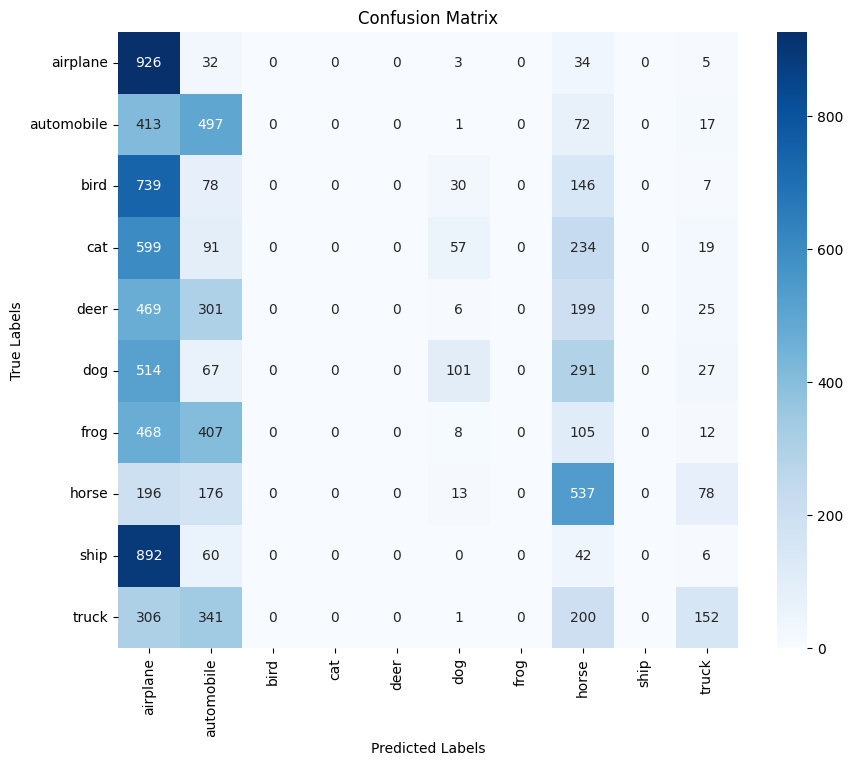

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Predict on the test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_labels = y_pred.argmax(axis=1)
y_true_labels = y_test_cat.argmax(axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


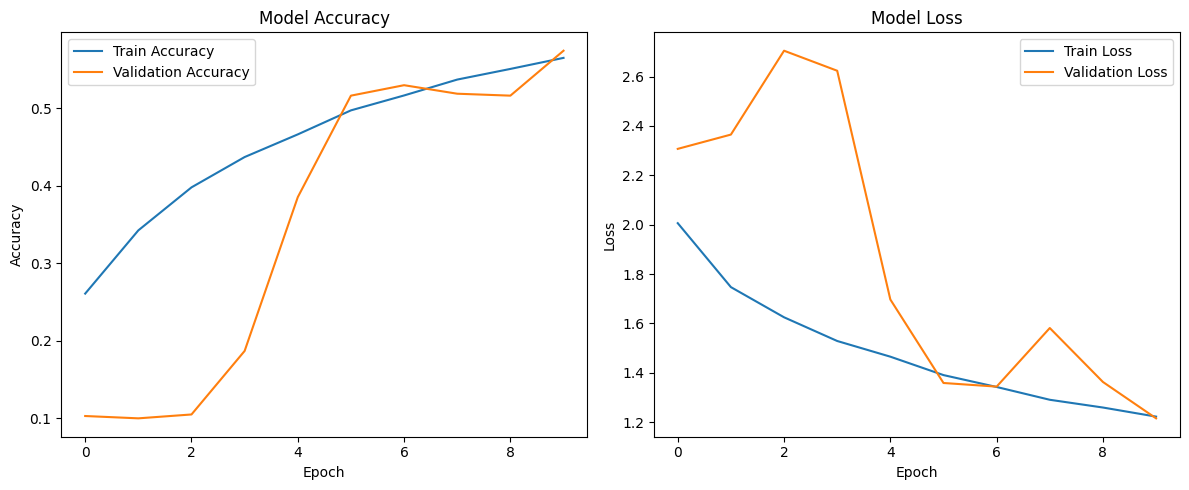

In [ ]:
# Plot accuracy and loss curves
def plot_training(history):
    plt.figure(figsize=(12,5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training(history)
